---
# Ejercicio 8
**a)** Sean U y V dos variables aleatorias uniformes en $(0,1)$ e independientes. Pruebe que la variable $X = U + V$ tiene una *densidad triangular*:

$$
f(x) =
\begin{cases}
x    \quad \text{ si } 0 \leq x < 1 \\
2-x  \quad \text{ si } 1 \leq x < 2 \\
0    \quad \text{ si } cc
\end{cases}
$$

In [1]:
from typing import Callable
from random import random
from time import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

Fuente: 🌎 [Wikipedia](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_triangular)

Decimos que una variable aleatoria tiene *densidad triangular* si:
- tiene un valor mínimo a
- un valor máximo b
- una moda c 

De modo que la función de densidad de probabilidad es cero para los extremos (a y b), y afín entre cada extremo y la moda, por lo que su gráfico es un triángulo.

En este caso el *valor mínimo* es 0, el *valor máximo es* 1 y la *moda* es 1 

In [2]:
def f(x:float) -> float:
    """
    Función de densidad del ejercicio

    Args:
        x (float): parámetro de entrada

    Returns:
        float: densidad de x
    """
    return np.where(
        (0 <= x) & (x < 1),
        x,
        np.where(
            (1 <= x) & (x < 2),
            2-x,
            0   
        )
    )

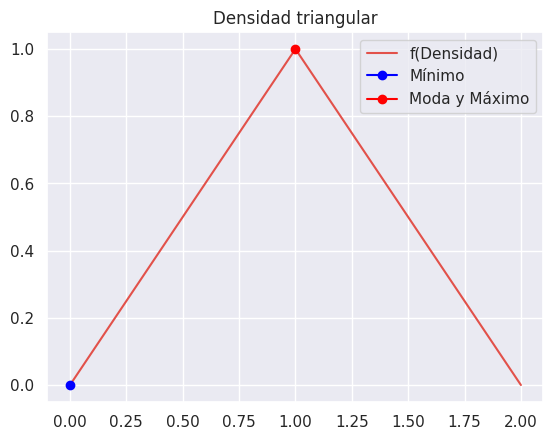

In [ ]:
x = np.linspace(0,2, 1000)
fashion = (1,1)
m0 = (0,0)

sns.set_palette("Spectral")
sns.lineplot(x=x, y=f(x=x), label="f(Densidad)")
plt.plot(m[0], m[1], marker='o', color='blue', label="Mínimo")
plt.plot(fashion[0], fashion[1], marker='o', color='red', label="Moda y Máximo")
plt.title("Densidad triangular")
plt.legend()
plt.show()

---
**b)**  Desarrolle tres algoritmos que simulen la variable X:
- i. Usando la propiedad que X es suma de dos uniformes independientes.
- ii) Aplicando transformada inversa.
- iii) Con el método de rechazo.

# Distribución acumulada
Para la generación de las variables aleatorias de los métodos debo simular la acumulada, por ello:

- Resultado teórico: $F'(x) = f(x)$
- Como tengo $f(x)$, debo sacar la antiderivada y obtengo $F$

## Antiderivada:
- **Si $x<0$:**
$$
    \int_{-\infty}^x f(t)dt = 0
$$

- **Si $0 \leq x$:**
$$
    \int_{-\infty}^x f(t)dt = \int_{0}^x f(t)dt = \int_{0}^x tdt = \frac{1}{2} \cdot t^2\bigg|_0^x = \boxed{\frac{1}{2}\cdot x^2}
$$

- **Si $1 \leq x$:**
$$
\begin{align*}
    \int_{-\infty}^x f(t)dt &= \int_{0}^1 f(t)dt + \int_{1}^x f(t)dt = \frac{1}{2} + \int_{1}^x 2 - t \quad dt = \frac{1}{2} + 2 \cdot \int_{1}^x 1 dt - \int_{1}^x tdt \\[0.4cm]
  &= \frac{1}{2} + 2 t\bigg|_1^x - \frac{1}{2}\cdot t^2 \bigg|_1^x = \frac{1}{2} + 2(x-1) - \frac{1}{2} \cdot (x²-1) = \boxed{-\frac{1}{2}x^2 + 2x - 1}
 \end{align*}
$$

- **Si $2 \leq x$:**
$$
\begin{align*}
    \int_{-\infty}^x f(t)dt &= \int_{0}^1 f(t)dt + \int_{1}^2 f(t)dt + \int_{2}^x f(t)dt = \int_{0}^1 f(t)dt + \int_{1}^2 f(t)dt + 0 = \int_{0}^1 f(t)dt + \int_{1}^2 f(t)dt \\[0.4cm]
    &= \int_{0}^1 t dt + \int_{1}^2 2-t dt = \frac{1}{2} \cdot t \bigg|_0^1 +  2 t\bigg|_1^2 - \frac{1}{2}\cdot t^2 \bigg|_1^2 = \frac{1}{2} + 2 - \frac{1}{2} \cdot (2^2 - 1^2) = \frac{1}{2} + 2 - \frac{1}{2} \cdot 3 = \boxed{1}
\end{align*}
$$


Finalmente obtenemos $F$:
$$
F(x) =
\begin{cases}
0                           & \text{si } x < 0 \\[0.3cm]
\frac{1}{2} \cdot x^2       & \text{si } 0 \leq x < 1 \\[0.3cm]
-\frac{1}{2}x^2 + 2x - 1    & \text{si } 1 \leq x < 2 \\[0.3cm]
1                           & \text{si } 2 \leq x
\end{cases}
$$


# Suma de dos uniformes


Simple:
$$
X = U + Y
$$

Donde $U,Y \thicksim \mathbb{U}(0,1)$

In [7]:
def two_uniforms() -> float:
    """
    Variable aleatoria, suma de dos uniformes

    Returns:
        float: valor aleatorio
    """
    return random() + random()

# Transformada inversa

Para este caso tenemos que el método de la transformada inversa:
$$
U = F^{-1}(x), \quad \text{para donde esté definida F}
$$

Por ende:
- **Si $0 \leq x < 1$**:
$$
\begin{align*}
    U &= \frac{1}{2} \cdot x²\\[0.4cm]
  \sqrt{2U}  &= x 
\end{align*}
$$

- Punto de quiebre:
$$
F(1) = -\frac{1}{2}\cdot 1 + 2\cdot 1 - 1 = -\frac{1}{2} + 1 = \frac{1}{2}
$$

- **Si $1 \leq x < 2$**
$$
\begin{align*}
   U &= -\frac{1}{2}x^2 + 2x - 1\\[0.4cm]
   0 &=  -\frac{1}{2}x^2 + 2x + (- 1 - U)\\[0.4cm]
\end{align*}
$$

Luego de calcular Baskhara:
$$
x_1 = 2 +\sqrt{2-2U}\\[0.4cm]
x_2 = 2 -\sqrt{2-2U}
$$

Como $x \in [1,2)$ debemos ver qué valor de x debe tomar U.

Para ello evaluamos U en los extremos, i.e en 0 y 1:

- **Si $U=0$:**
$$
x_1 = 2 +\sqrt{2-2*0} \\[0.3cm]
x_1 = 2 + \sqrt{2}
x_1 \approx 3.414
$$

**No podemos utilizar $x_1$, evidentemente.**

- **Si $U=0$:**
$$
x_2 = 2 -\sqrt{2-2\cdot 0} \\[0.3cm]
x_2 = 2 - \sqrt{2}\\[0.3cm]
x_2 \approx 0.586
$$

**Si $U=1$:**
$$
x_2 = 2 -\sqrt{2-2\cdot 1} \\[0.3cm]
x_2 = 2 - \sqrt{2}\\[0.3cm]
x_2 = 2
$$

**Border pero vale.**

Se utiliza $U = 2 - \sqrt{2-2\cdot U}$

In [20]:
def TIX() -> float:
    """
    Generación de variable aleatoria
    Por el método de la transformada inversa

    Returns:
        float: Valor aleatorio
    """
    U = random()
    if U < 0.5:
        return (2*U) ** 0.5
    else:
        return 2 - ((2 - 2*U) ** 0.5)

# Método de rechazo

---
# Comparativa

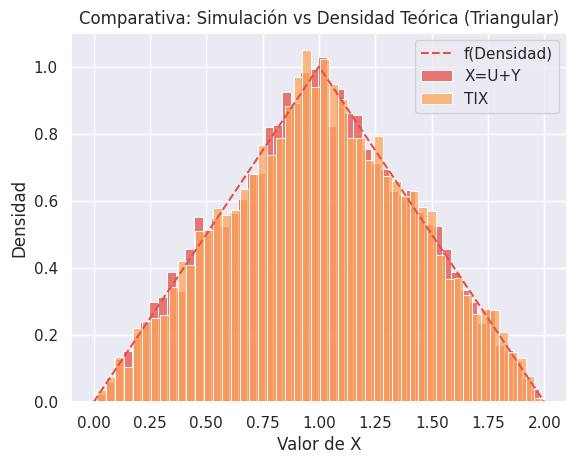

In [ ]:
Nsim = 10_000  

x = np.linspace(0, 2, 1000)

#X = U+Y
X_sim = [two_uniforms() for _ in range(Nsim)]

#Transformada inversa
TIX_sim = [TIX() for _ in range(Nsim)]

sns.set_palette("Spectral")
sns.histplot(X_sim, bins=50, stat='density', label="X=U+Y")
sns.histplot(TIX_sim, bins=50, stat='density', label="TIX")

sns.lineplot(x=x, y=f(x), label="f(Densidad)", linestyle='--')

# Títulos y leyenda
plt.title("Comparativa: Simulación vs Densidad Teórica (Triangular)")
plt.xlabel("Valor de X")
plt.ylabel("Densidad")
plt.legend()
plt.show()
